In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# Print shapes of the data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
# Flatten the 28x28 images into vectors of size 784
X_train = X_train.reshape((X_train.shape[0], 32 * 32 * 3)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 32 * 32 * 3)).astype('float32')

# Normalize the pixel values to [0, 1]
X_train /= 255.0
X_test /= 255.0

In [4]:
# Build the MLP model
model = Sequential()

# Add input layer and a hidden layer
model.add(Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))  # Input size is 784 (28x28 flattened)
model.add(Dense(256, activation='relu'))  # Hidden layer
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(100, activation='softmax'))  # Output layer (10 units for 10 classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,750,500 (6.68 MB)

 Trainable params: 1,750,500 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Convert target variables to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
trained = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.0393 - loss: 4.3933 - val_accuracy: 0.0987 - val_loss: 3.8941
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1158 - loss: 3.8036 - val_accuracy: 0.1456 - val_loss: 3.6793
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1523 - loss: 3.6063 - val_accuracy: 0.1590 - val_loss: 3.5831
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1702 - loss: 3.4778 - val_accuracy: 0.1788 - val_loss: 3.4765
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1924 - loss: 3.3831 - val_accuracy: 0.1888 - val_loss: 3.4400
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2026 - loss: 3.3052 - val_accuracy: 0.1836 - val_loss: 3.4560
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2189 - loss: 3.2328 - val_accuracy: 0.2033 - val_loss: 3.3481
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2282 - loss: 3.1732 - val_accuracy: 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Epoch')

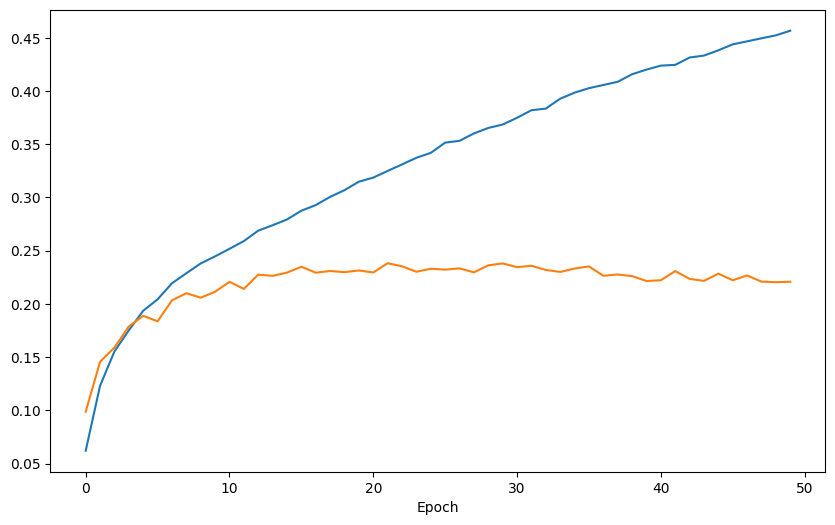

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(trained.history['accuracy'], label='Training accuracy')
plt.plot(trained.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [12]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Get the predicted class labels

# Convert y_test back to class labels from one-hot encoding
y_test_labels = np.argmax(y_test, axis=1)

# Now use y_test_labels instead of y_test for metric calculations
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted') # Use 'weighted' for multiclass
recall = recall_score(y_test_labels, y_pred, average='weighted') # Use 'weighted' for multiclass
f1 = f1_score(y_test_labels, y_pred, average='weighted') # Use 'weighted' for multiclass

# Print the classification metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.2208
Precision: 0.2248067051916031
Recall: 0.2208
F1 Score: 0.21760409605620962

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.44      0.48       100
           1       0.24      0.28      0.26       100
           2       0.19      0.17      0.18       100
           3       0.16      0.15      0.15       100
           4       0.10      0.10      0.10       100
           5       0.17      0.21      0.19       100
           6       0.20      0.18      0.19       100
           7       0.27      0.26      0.27       100
           8       0.15      0.25      0.19       100
           9       0.34      0.28      0.31       100
          10       0.09      0.04      0.06       100
          11       0.08      0.09      0.09       100
          12       0.21      0.22      0.21       100
          13       0.17      0.13      0.15       100
          14       0.19      0.1